In [1]:
#Install PyCaret for Google Colab
!pip install pycaret

#import enable colab for interactive visuals
from pycaret.utils import enable_colab
enable_colab()

     |████████████████████████████████| 288 kB 12.6 MB/s 
     |████████████████████████████████| 113 kB 49.5 MB/s 
     |████████████████████████████████| 2.0 MB 31.6 MB/s 
     |████████████████████████████████| 261 kB 36.0 MB/s 
     |████████████████████████████████| 15.5 MB 18.2 MB/s 
     |████████████████████████████████| 86 kB 3.4 MB/s 
     |████████████████████████████████| 1.3 MB 37.8 MB/s 
     |████████████████████████████████| 167 kB 52.6 MB/s 
     |████████████████████████████████| 56 kB 4.3 MB/s 
     |████████████████████████████████| 6.8 MB 9.3 MB/s 
     |████████████████████████████████| 1.7 MB 26.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 596 kB 41.4 MB/s 
     |████████████████████████████████| 102 kB 10.4 MB/s 
     |████████████████████████████████| 303 kB 50.9 MB/s 
     |█████████████████

In [2]:
# Importing data using pandas
import pandas as pd
dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data')

#Rename all columns
dataset.columns =['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight','Rings']
dataset.shape

(4176, 9)

In [3]:
#As per instructions, the target column is Age, which is Rings + 1.5. 

#Create new data frame and copy Rings
df = dataset[['Rings']].copy()

#Add 1.5 to all values
df = df + 1.5

#Name the dataframe column as Age
df.columns =['Age']

#drop Rings
dataset = dataset.drop('Rings', axis = 1)

#Add Age to original Dataset
dataset = dataset.join(df)
dataset.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,9.5


In [4]:
#Remove some data to be used for predication on the choosen model at end of task.

data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (3758, 9)
Unseen Data For Predictions: (418, 9)


In [5]:
#Explaratory Data Analysis
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3758 entries, 0 to 3757
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3758 non-null   object 
 1   Length          3758 non-null   float64
 2   Diameter        3758 non-null   float64
 3   Height          3758 non-null   float64
 4   Whole weight    3758 non-null   float64
 5   Shucked weight  3758 non-null   float64
 6   Viscera weight  3758 non-null   float64
 7   Shell weight    3758 non-null   float64
 8   Age             3758 non-null   float64
dtypes: float64(8), object(1)
memory usage: 264.4+ KB


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.655,0.550,0.180,1.2740,0.586,0.2810,0.365,11.5
1,I,0.550,0.445,0.110,0.7935,0.378,0.1420,0.260,11.5
2,M,0.385,0.295,0.095,0.3350,0.147,0.0940,0.090,8.5
3,I,0.225,0.165,0.055,0.0590,0.027,0.0125,0.015,5.5
4,M,0.655,0.530,0.175,1.2635,0.486,0.2635,0.415,16.5


In [6]:
#Setup PyCaret using the built in function called setup()

from pycaret.regression import *
exp_reg101 = setup(data = data, target = 'Age', session_id=123) 

,Description,Value
0,session_id,123
1,Target,Age
2,Original Data,"(3758, 9)"
3,Missing Values,False
4,Numeric Features,7
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(2630, 10)"


In [7]:
#Comparing all models 

#This function is used to train all available model libraries and scores them using k-fold cross validation. 
#Fold is changed from 10 (default) to 5 for better training time.
best = compare_models(fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,1.5613,4.9831,2.2319,0.5149,0.1572,0.1325,0.288
lr,Linear Regression,1.6043,4.9900,2.2333,0.5145,0.1645,0.1371,0.622
br,Bayesian Ridge,1.6043,4.9904,2.2334,0.5145,0.1644,0.1371,0.018
lar,Least Angle Regression,1.6048,4.9934,2.2341,0.5142,0.1646,0.1372,0.018
rf,Random Forest Regressor,1.5754,4.9934,2.2340,0.5136,0.1587,0.1342,1.004
ridge,Ridge Regression,1.6109,5.0514,2.2470,0.5088,0.1644,0.1379,0.016
et,Extra Trees Regressor,1.5975,5.0877,2.2551,0.5049,0.1598,0.1359,0.750
lightgbm,Light Gradient Boosting Machine,1.5928,5.1076,2.2596,0.5021,0.1597,0.1346,0.164
huber,Huber Regressor,1.5629,5.1338,2.2649,0.5014,0.1641,0.1291,0.076
knn,K Neighbors Regressor,1.6177,5.3545,2.3130,0.4781,0.1641,0.1360,0.076


After looking at the results of all models. If we look at R2 of all models, we can see that the top 3 (Gradient Boosting Regressor, Linear Regressor, and Bayesian Ridge) are the best and will be used to compare performance metrics.

In [8]:
gbr = create_model('gbr')
print(gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.4524,4.3741,2.0914,0.5124,0.1493,0.1263
1,1.5862,4.9850,2.2327,0.5656,0.1540,0.1365
2,1.4553,4.2982,2.0732,0.5679,0.1492,0.1249
3,1.6295,5.3252,2.3076,0.5635,0.1589,0.1352
4,1.5143,4.4407,2.1073,0.4231,0.1516,0.1304
5,1.6046,5.1850,2.2771,0.4810,0.1588,0.1339
6,1.5947,4.9252,2.2193,0.5233,0.1562,0.1333
7,1.5460,5.1363,2.2663,0.5465,0.1552,0.1240
8,1.5402,4.9886,2.2335,0.4596,0.1632,0.1365
9,1.5447,4.9600,2.2271,0.5795,0.1590,0.1308


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [9]:
lr = create_model('lr')
print(lr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.5300,4.4292,2.1046,0.5062,0.1541,0.1332
1,1.6537,5.0924,2.2566,0.5562,0.1591,0.1431
2,1.5330,4.5450,2.1319,0.5431,0.1565,0.1331
3,1.7343,6.0420,2.4580,0.5048,0.1708,0.1440
4,1.5256,4.3051,2.0749,0.4408,0.1519,0.1330
5,1.6141,5.1538,2.2702,0.4842,0.1607,0.1360
6,1.6498,5.1323,2.2654,0.5033,0.1750,0.1406
7,1.5183,4.7460,2.1785,0.5809,0.1538,0.1232
8,1.5671,4.7622,2.1823,0.4841,0.1591,0.1358
9,1.7103,5.5399,2.3537,0.5303,0.1997,0.1479


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)


In [10]:
br = create_model('br')
print(br)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.5299,4.4381,2.1067,0.5052,0.1542,0.1332
1,1.6555,5.0993,2.2582,0.5556,0.1593,0.1433
2,1.5336,4.5483,2.1327,0.5428,0.1564,0.1332
3,1.7330,6.0208,2.4537,0.5065,0.1705,0.1439
4,1.5240,4.2948,2.0724,0.4421,0.1516,0.1329
5,1.6134,5.1477,2.2689,0.4848,0.1605,0.1360
6,1.6565,5.1721,2.2742,0.4994,0.1781,0.1414
7,1.5162,4.7426,2.1777,0.5812,0.1536,0.1230
8,1.5666,4.7659,2.1831,0.4837,0.1591,0.1358
9,1.7100,5.5418,2.3541,0.5302,0.1979,0.1479


BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)


As we created all three models. They use all default hyperparameters to train the model. To tune the hyperparameter to use the best fitted paramteres, we can use the function tune_model().

In [11]:
tuned_gbr = tune_model(gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.4997,4.5536,2.1339,0.4924,0.1548,0.1330
1,1.6580,5.4791,2.3407,0.5225,0.1667,0.1470
2,1.5128,4.6146,2.1482,0.5361,0.1576,0.1347
3,1.7833,6.3917,2.5282,0.4761,0.1753,0.1505
4,1.4690,4.3532,2.0864,0.4345,0.1522,0.1291
5,1.6355,5.3956,2.3229,0.4599,0.1640,0.1409
6,1.6597,5.2022,2.2808,0.4965,0.1635,0.1420
7,1.6497,5.6632,2.3797,0.4999,0.1669,0.1367
8,1.5451,4.8822,2.2096,0.4711,0.1625,0.1385
9,1.6643,5.5815,2.3625,0.5268,0.1718,0.1456


In [12]:
tuned_lr = tune_model(lr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.5300,4.4292,2.1046,0.5062,0.1541,0.1332
1,1.6537,5.0924,2.2566,0.5562,0.1591,0.1431
2,1.5330,4.5450,2.1319,0.5431,0.1565,0.1331
3,1.7343,6.0420,2.4580,0.5048,0.1708,0.1440
4,1.5256,4.3051,2.0749,0.4408,0.1519,0.1330
5,1.6141,5.1538,2.2702,0.4842,0.1607,0.1360
6,1.6498,5.1323,2.2654,0.5033,0.1750,0.1406
7,1.5183,4.7460,2.1785,0.5809,0.1538,0.1232
8,1.5671,4.7622,2.1823,0.4841,0.1591,0.1358
9,1.7103,5.5399,2.3537,0.5303,0.1997,0.1479


In [13]:
tuned_br = tune_model(br)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.5299,4.4382,2.1067,0.5052,0.1542,0.1332
1,1.6555,5.0997,2.2582,0.5556,0.1592,0.1432
2,1.5334,4.5481,2.1326,0.5428,0.1564,0.1331
3,1.7327,6.0192,2.4534,0.5066,0.1704,0.1439
4,1.5239,4.2941,2.0722,0.4422,0.1516,0.1329
5,1.6134,5.1474,2.2688,0.4848,0.1605,0.1359
6,1.6565,5.1724,2.2743,0.4994,0.1781,0.1414
7,1.5158,4.7421,2.1776,0.5813,0.1535,0.1230
8,1.5665,4.7658,2.1831,0.4837,0.1591,0.1358
9,1.7101,5.5429,2.3543,0.5301,0.1978,0.1479


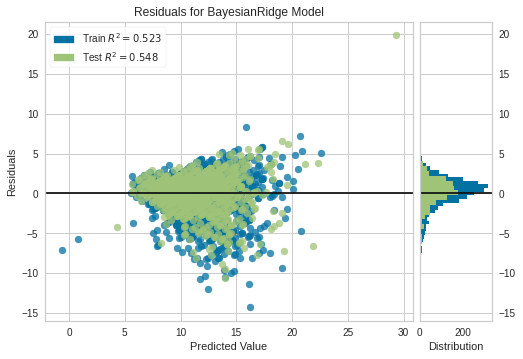

In [14]:
#Residual Plot
plot_model(tuned_br)

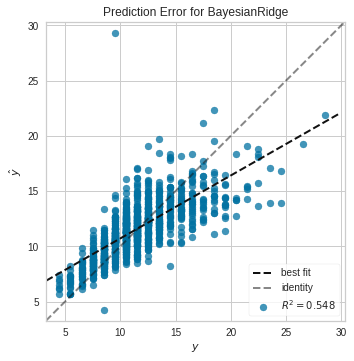

In [15]:
#Prediction Error Plot
plot_model(tuned_br, plot = 'error')

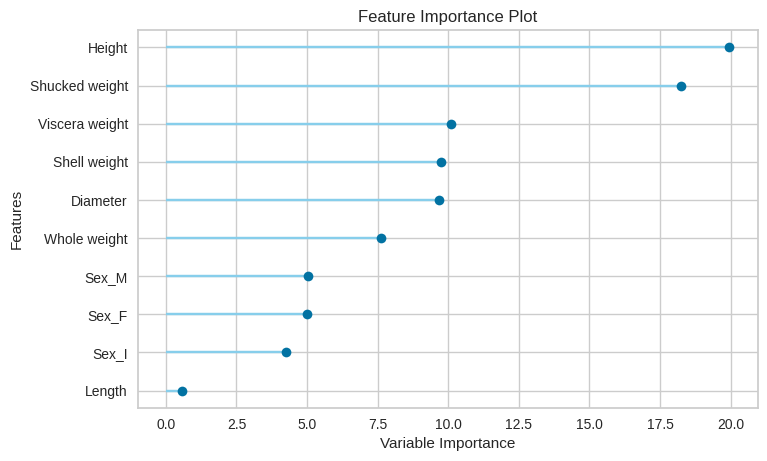

In [16]:
#Feature Importance Plot
plot_model(tuned_br, plot='feature')

In [17]:
#This functions allows users and data scientist to see a GUI for all available plots for the model.
evaluate_model(tuned_br)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [18]:
#Predicting on Test data set
predict_model(tuned_br);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,1.544,4.7194,2.1724,0.5484,0.156,0.1349


In [19]:
#Finialize model, this model is used to for making predictions on unseen data from beginning.
final_br = finalize_model(tuned_br)
print(final_br)
predict_model(final_br);

BayesianRidge(alpha_1=0.01, alpha_2=0.1, alpha_init=None, compute_score=False,
              copy_X=True, fit_intercept=False, lambda_1=0.2, lambda_2=0.1,
              lambda_init=None, n_iter=300, normalize=True, tol=0.001,
              verbose=False)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,1.5296,4.4535,2.1103,0.5738,0.1541,0.1333


In [20]:
#Predict on unseen data
unseen_predictions = predict_model(final_br, data=data_unseen)
unseen_predictions.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age,Label
0,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,21.5,15.029051
1,M,0.490,0.380,0.135,0.5415,0.2175,0.0950,0.190,12.5,12.082009
2,F,0.470,0.355,0.100,0.4755,0.1675,0.0805,0.185,11.5,11.898498
3,M,0.450,0.320,0.100,0.3810,0.1705,0.0750,0.115,10.5,10.140119
4,F,0.615,0.480,0.165,1.1615,0.5130,0.3010,0.305,11.5,11.952187


In [21]:
#We can check the metrics on this data by using check_metric from pycaret.utils and predict it on our target value, which is Age.
from pycaret.utils import check_metric
check_metric(unseen_predictions['Age'], unseen_predictions.Label, 'R2')

0.5516

In [22]:
#Save model so that we don't have to do all the steps again and can be ready to use when new data arrives.
save_model(final_br,'Final Bayesian Ridge 12Dec2021')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='Age',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='me...
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  BayesianRidge(alpha_1=0.01, alpha_2=0.1, alpha_init=None,


In [23]:
#load saved model in same environment or a different one to test on new data.
saved_final_br = load_model('Final Bayesian Ridge 12Dec2021')

Transformation Pipeline and Model Successfully Loaded


In [24]:
new_prediction = predict_model(saved_final_br, data=data_unseen)
new_prediction.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age,Label
0,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,21.5,15.029051
1,M,0.490,0.380,0.135,0.5415,0.2175,0.0950,0.190,12.5,12.082009
2,F,0.470,0.355,0.100,0.4755,0.1675,0.0805,0.185,11.5,11.898498
3,M,0.450,0.320,0.100,0.3810,0.1705,0.0750,0.115,10.5,10.140119
4,F,0.615,0.480,0.165,1.1615,0.5130,0.3010,0.305,11.5,11.952187


In [25]:
from pycaret.utils import check_metric
check_metric(new_prediction['Age'], new_prediction.Label, 'R2')

0.5516